# Text Mining

With the words $text\; mining$ we refer to all those methods used to extract relevant information from big and ususally unstructured collections of textual documents. Another way to refer to text mining is $information \; retrival$. 
For example, if in a given medical database we would like to find all the documents related to a certain syndrom, we can ask a $query$ containing the key words relevant to identify the chosen content. The research system will do a match between the query and all the documents inserted in the database. Such documents will be "ordered" according to their "connection" to the query. 

The key words containing information about the content of a given document are called $terms$. The first step consists in creating a list of all the terms, i.e., an $index$ is created. Then for every term, a list of the documents containing that term is stored. 

<div>
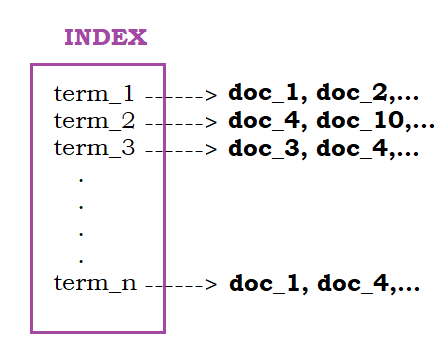
</div>

Before starting using any techique related to text mining is fundamental to make some preprocessing steps:

1) The so called "stop words" are removed: conjunctions, articles, adverbs, etc. 

2) Stemming: only the root of every word is kept.

<div>
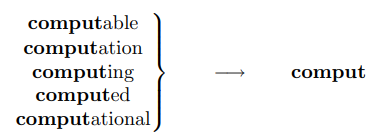
</div>

# Vector space Model

A $term-document$ matrix is created. Each column vector represents a document.
Every column has non zero elements in the rows corresponding to the documents containing the specific term. 
The value stored corresponds to the importance of the key word compared to the considered document. Usually this value is related to the frequency of occurrence of that word in the document (TF). 


<div>
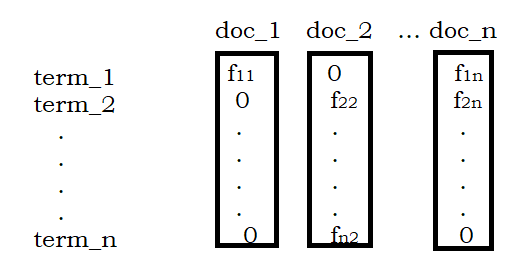
</div>


In the realistic scenarios the so called $text\; parsers$ are usually employed. These objects automatically remove the stop words and perform stemming as well. Moreover, they allow to add specific filters to remove formatted codes. 

In general, for every key word the frequency of occurrence is counted. Other methods are:

- Binary Weights: 1 the term is present; 0 the term is absent;
- Inverse Document Frequency (IDF):
  $$IDF(t) = 1+log\left(\frac{N}{Df(t)}\right)$$
  $N$: number of documents in the corpus,
  
  $Df(t)$: number of documents with the term $t$,
  
- Term Frequency Inverse Document Frequency (TF-IDF):
  $$TF\_IDF(t) = TF(t)\times IDF(t)$$

In [11]:
import sklearn
import numpy as np
import sklearn.feature_extraction

np.set_printoptions(suppress=True)

vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)

documents = [
    'How to Bake Bread Without Recipes',
    'The Classic Art of Viennese Pastry',
    'Numerical Recipes: The Art of Scientific Computing',
    'Breads, Pastries, Pies and Cakes: Quantity Baking Recipes',
    'Pastry: A Book of Best French Recipes',
    'Numerical Python',
    'Baking at the 20th Century Cafe: Iconic European Desserts from Linzer Torte to Honey Cake',
    'Python Cookbook: Recipes for Mastering Python',
    'Understanding Baking: The Art and Science of Baking'
]

X = vectorizer.fit_transform(documents).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = X.T
print(A)

vectorizer.vocabulary_: {'how': 23, 'to': 38, 'bake': 4, 'bread': 8, 'without': 42, 'recipes': 34, 'the': 37, 'classic': 14, 'art': 2, 'of': 28, 'viennese': 41, 'pastry': 30, 'numerical': 27, 'scientific': 36, 'computing': 15, 'breads': 9, 'pastries': 29, 'pies': 31, 'and': 1, 'cakes': 12, 'quantity': 33, 'baking': 5, 'book': 7, 'best': 6, 'french': 20, 'python': 32, 'at': 3, '20th': 0, 'century': 13, 'cafe': 10, 'iconic': 24, 'european': 18, 'desserts': 17, 'from': 21, 'linzer': 25, 'torte': 39, 'honey': 22, 'cake': 11, 'cookbook': 16, 'for': 19, 'mastering': 26, 'understanding': 40, 'science': 35}
[[0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 2]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1

In [13]:
import matplotlib.pyplot as plt

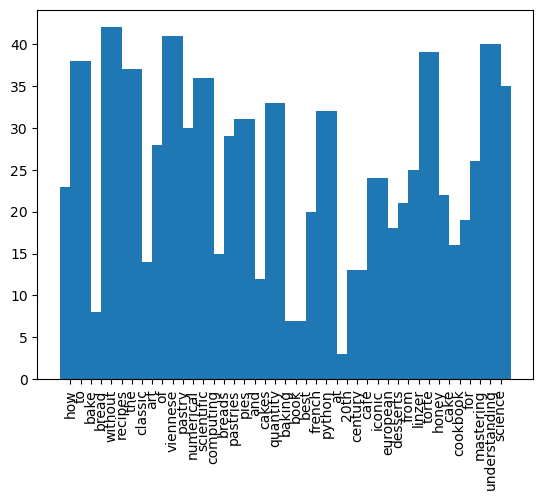

In [15]:
_ = plt.bar(range(len(vectorizer.vocabulary_)), list(vectorizer.vocabulary_.values()), align='center', width=2)
_ = plt.xticks(range(len(vectorizer.vocabulary_)), list(vectorizer.vocabulary_.keys()),rotation='vertical')

In [13]:
#plt.bar(*zip(*vectorizer.vocabulary_.items()))

We proceed to install ``Gensim``: a open-source Python library that helps us to preprocess the documents. 

In [17]:
! pip install gensim

In [19]:
from gensim.parsing.preprocessing import remove_stopwords, stem_text


In [21]:
L = []
for i in range(len(documents)):
     L.append(stem_text(documents[i]))
print('\n List of documents without stop words\n ', L)

L_final = []
for i in range(len(documents)):
    L_final.append(remove_stopwords(L[i]))
print('\n List of documents after stemming \n ', L_final)


 List of documents without stop words
  ['how to bake bread without recip', 'the classic art of viennes pastri', 'numer recipes: the art of scientif comput', 'breads, pastries, pi and cakes: quantiti bake recip', 'pastry: a book of best french recip', 'numer python', 'bake at the 20th centuri cafe: icon european dessert from linzer tort to honei cake', 'python cookbook: recip for master python', 'understand baking: the art and scienc of bake']

 List of documents after stemming 
  ['bake bread recip', 'classic art viennes pastri', 'numer recipes: art scientif comput', 'breads, pastries, pi cakes: quantiti bake recip', 'pastry: book best french recip', 'numer python', 'bake 20th centuri cafe: icon european dessert linzer tort honei cake', 'python cookbook: recip master python', 'understand baking: art scienc bake']


In [23]:
Y = vectorizer.fit_transform(L_final).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = Y.T
print(A.shape)

vectorizer.vocabulary_: {'bake': 2, 'bread': 6, 'recip': 29, 'classic': 12, 'art': 1, 'viennes': 35, 'pastri': 23, 'numer': 22, 'recipes': 30, 'scientif': 32, 'comput': 13, 'breads': 7, 'pastries': 24, 'pi': 26, 'cakes': 10, 'quantiti': 28, 'pastry': 25, 'book': 5, 'best': 4, 'french': 17, 'python': 27, '20th': 0, 'centuri': 11, 'cafe': 8, 'icon': 19, 'european': 16, 'dessert': 15, 'linzer': 20, 'tort': 33, 'honei': 18, 'cake': 9, 'cookbook': 14, 'master': 21, 'understand': 34, 'baking': 3, 'scienc': 31}
(36, 9)


In [25]:
 #query vector
query1text = ['Pies and Cakes Baking']
query_stem = query1text[0]
query1 = []
query1.append(remove_stopwords(stem_text(query_stem)))
print(query1)
query1 = vectorizer.transform(query1).toarray().T
print(query1.shape)

['pi cake bake']
(36, 1)


In [27]:
(m,n)=A.shape
print(A.shape)
#eu=np.array(np.zeros(n))
#for i in range(n):
#    eu[i] = np.linalg.norm(A[:,i],2)
eu = np.sqrt(np.sum(A**2,axis=0))
#An= np.dot(A,np.diag(1/eu))
An = A/eu
print(An.shape)

(36, 9)
(36, 9)


The search for relevant documents
is carried out by computing the cosines of the angles  between the query
vector and the document vectors. A document is returned as relevant
only if the cosine of the angle it makes with the query vector is greater than some
threshold or cutoff value.

Let us compute the cosine similarity between every vector of An and  ``query1``

In [29]:
cossim1=np.dot(An.T,query1)/np.linalg.norm((query1),2)
print(cossim1)

[[0.33333333]
 [0.        ]
 [0.        ]
 [0.43643578]
 [0.        ]
 [0.        ]
 [0.34815531]
 [0.        ]
 [0.25819889]]


In [35]:
print(query1text)


['Pies and Cakes Baking']


In [37]:
indmax=np.argmax(cossim1,0)
print(indmax)
print(documents[indmax[0]])

[3]
Breads, Pastries, Pies and Cakes: Quantity Baking Recipes


In [39]:
print(documents)

['How to Bake Bread Without Recipes', 'The Classic Art of Viennese Pastry', 'Numerical Recipes: The Art of Scientific Computing', 'Breads, Pastries, Pies and Cakes: Quantity Baking Recipes', 'Pastry: A Book of Best French Recipes', 'Numerical Python', 'Baking at the 20th Century Cafe: Iconic European Desserts from Linzer Torte to Honey Cake', 'Python Cookbook: Recipes for Mastering Python', 'Understanding Baking: The Art and Science of Baking']


# Rank reduction 

Now let us identify the dependence between the columns or rows of the term-by-document matrix. For a rank r matrix, the r basis vectors of its column space can be used in place of all its column vectors to represent its column space. 

One set of basis vectors is found by computing the QR factorization of the term-by-document matrix.

In [41]:
import scipy.linalg as spl
[Q,R,P]=spl.qr(An,mode='economic',pivoting=True)
print(np.diag(R))

[-1.         -1.         -1.         -0.98473193 -0.96501295 -0.93316953
 -0.9078336  -0.89476244 -0.78468552]


In [52]:
nR = 6
QA=np.copy(Q[:,0:nR])
# QA basis for the column space of A
RA=np.copy(R[0:nR,:])
print(np.diag(RA)/RA[0,0])
eu_ra = np.sqrt(np.sum(RA**2,axis=0))
RA=RA/eu_ra
# In general, it is necessary to use column 
# pivoting during the QR factorization to ensure that the zeros appear 
# at the bottom of the matrix AP = QR
QAO =np.copy( Q[:,nR:9])
# The  columns of QAO are a basis for the orthogonal
# complement of the column space of AP and so of the column space of A.
# Column pivoting provides important numerical advantages without changing the database, as
# permuting the columns of A results only in a reordering of the document vectors.

[1.         1.         1.         0.98473193 0.96501295 0.93316953]


The semantic content of a database is fully described by any basis for the column space of the associated term-by-document matrix, and query matching proceeds with the factors QR in place of the matrix AP.

In [55]:
NewA = An[:,P] # the original document with permuted column
Pn=np.array(np.zeros(P.shape),dtype='int')
Pn[P]=np.arange(P.shape[0],dtype='int')
print(Pn.dtype)
print(NewA.shape)
print(query1.shape)
costet0=np.dot(NewA.T,query1)/np.linalg.norm(query1,2)
print('\n cosine similarity between columns of An and query vector \n', costet0[Pn])
costet=np.dot(RA.T,np.dot(QA.T,query1))/np.linalg.norm(query1,2)
print('\n cosine similarity between columns of QR and query vector \n', costet[Pn])

int64
(36, 9)
(36, 1)

 cosine similarity between columns of An and query vector 
 [[0.33333333]
 [0.        ]
 [0.        ]
 [0.43643578]
 [0.        ]
 [0.        ]
 [0.34815531]
 [0.        ]
 [0.25819889]]

 cosine similarity between columns of QR and query vector 
 [[0.33333333]
 [0.        ]
 [0.05765895]
 [0.36167429]
 [0.        ]
 [0.        ]
 [0.34815531]
 [0.07671234]
 [0.25819889]]


In [48]:
indmax=np.argmax(cossim1,0)
print(indmax)
print(documents[indmax[0]])

[3]
Breads, Pastries, Pies and Cakes: Quantity Baking Recipes


In [50]:
[U,s,Vt]=np.linalg.svd(An)
print(s/s[0])

[1.         0.8844212  0.84817643 0.72059564 0.65487351 0.63936776
 0.59656753 0.51797811 0.41640252]


# Esercizio

Calcolare il coseno dell'angolo usando la svd, senza ricostruire la matrice approssimata e provare per diversi valori di k (parametro di compression)